Task:-Need to analyze and improve an email campaign for an e-commerce company.

The company sent out emails to users. The goal of these emails was to get people to click on a link inside the email. Clicking that link means the user is interested in the feature.

Will answer 3 main questions using data analysis and machine learning.

In [30]:
print("hello world")

hello world


There are 3 tables (in Excel sheet):

1. email_table – Info about each email

   email_id: Unique ID of the email

   email_text: Type of text — short or long

   email_version: Whether the email was personalized or generic 
   
   hour: Hour the email was sent

   weekday: Day of the week it was sent

   user_country: Country of the user

   user_past_purchases: How many times user has purchased in the past

2. email_opened_table – List of emails that were opened

3. link_clicked_table – List of emails where the link inside was clicked

What ned to be done(Tasks Simplified):
1. Analyze Campaign Performance
   Will calculate:
                % of emails that were opened = opened emails / total emails
                % of emails that were clicked = clicked emails / total emails

                This helps understand how the campaign performed.

2. Build a Machine Learning Model
    train a model to predict:
                “Will a user click the link if we send them an email?”

  Input data= Data in email_table
  Output data= Data in linked_clicked_data

  Goal: The model should help predict the best users and best time/content to send emails.

3. Estimate Model Improvement
  Calculate:

  Old click rate = total clicks / total emails

  New click rate = If we use the model to only send emails to the top users (based on prediction), what % might click?

4. Segment Analysis
  Find patterns like:

  Do users from a certain country click more?

  Do users with more past purchases click more?

  Do personalized emails work better?

  Does the sending hour or day make a difference?

In [31]:
#importing required libraries
import pandas as pd

In [32]:
email_opened=pd.read_csv(r"C:\Users\gvais\OneDrive\Desktop\xyz\email_opened_table.csv")
email=pd.read_csv(r"C:\Users\gvais\OneDrive\Desktop\xyz\email_table.csv")
link_clicked=pd.read_csv(r"C:\Users\gvais\OneDrive\Desktop\xyz\link_clicked_table.csv")

Skills Used:
Data cleaning & merging (e.g., merge tables using email_id)

Exploratory Data Analysis (EDA)

Feature engineering

Classification modeling

Evaluation (accuracy, precision, ROC AUC)

Interpretation of patterns

In [33]:
#data exploration(checking the info about dataset)
email_opened.head(5) , email.head(), link_clicked.head()

(   email_id
 0    284534
 1    609056
 2    220820
 3    905936
 4    164034,
    email_id   email_text email_version  hour    weekday user_country  \
 0     85120  short_email  personalized     2     Sunday           US   
 1    966622   long_email  personalized    12     Sunday           UK   
 2    777221   long_email  personalized    11  Wednesday           US   
 3    493711  short_email       generic     6     Monday           UK   
 4    106887   long_email       generic    14     Monday           US   
 
    user_past_purchases  
 0                    5  
 1                    2  
 2                    2  
 3                    1  
 4                    6  ,
    email_id
 0    609056
 1    870980
 2    935124
 3    158501
 4    177561)

In [34]:
#checking for null value
email_opened.isna().sum()

email_id    0
dtype: int64

In [35]:
#checking for null value
email.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [36]:
#checking for null value
link_clicked.isnull().sum()

email_id    0
dtype: int64

In [37]:
#checking for duplicates
print(email_opened.duplicated().sum()), print(email.duplicated().sum()) , print(link_clicked.duplicated().sum())

0
0
0


(None, None, None)

Data Visualization

In [38]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# 1. Creating clicked and opened columns
email['opened'] = email['email_id'].isin(email_opened['email_id']).astype(int)
email['clicked'] = email['email_id'].isin(link_clicked['email_id']).astype(int)

In [40]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
# using a clean theme
sns.set(style='whitegrid')

def plot_segment_trends(df, segment_col, top_n=None):
    # Group + calculate rates
    data = df.groupby(segment_col).agg(
        total_emails=('email_id', 'count'),
        opened=('opened', 'sum'),
        clicked=('clicked', 'sum')
    ).reset_index()

    data['open_rate (%)'] = round(100 * data['opened'] / data['total_emails'], 2)
    data['click_rate (%)'] = round(100 * data['clicked'] / data['total_emails'], 2)

    # Limit to top N values if needed (e.g., for country)
    if top_n:
        data = data.sort_values(by='total_emails', ascending=False).head(top_n)

    # Plot open and click rates
    plt.figure(figsize=(12, 5))
    x = data[segment_col].astype(str)

    # Open Rate
    plt.subplot(1, 2, 1)
    sns.barplot(x=x, y='open_rate (%)', data=data, palette='Blues_d')
    plt.title(f'Open Rate by {segment_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Click Rate
    plt.subplot(1, 2, 2)
    sns.barplot(x=x, y='click_rate (%)', data=data, palette='Greens_d')
    plt.title(f'Click Rate by {segment_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='open_rate (%)', data=data, palette='Blues_d')
C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='click_rate (%)', data=data, palette='Greens_d')


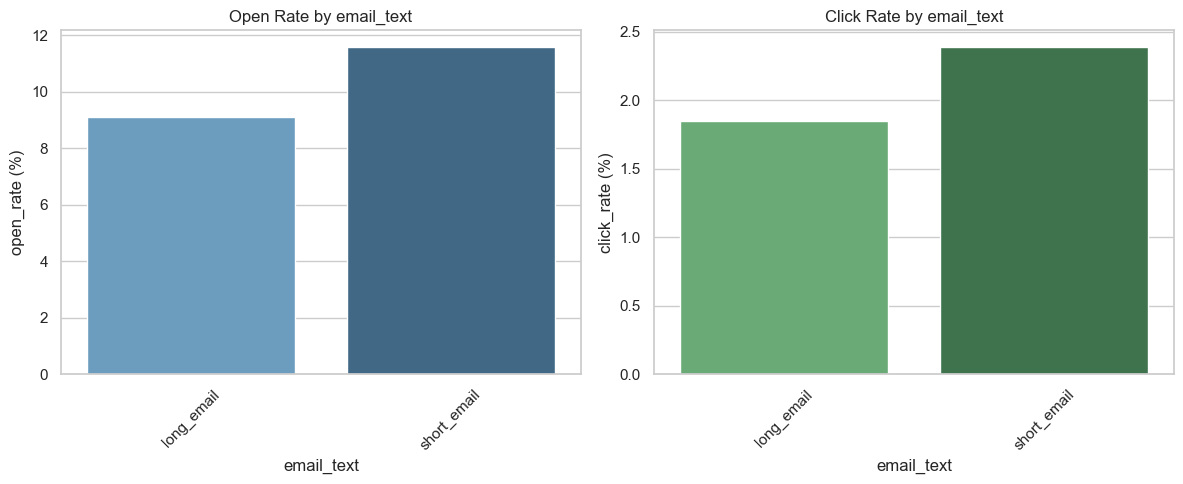

C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='open_rate (%)', data=data, palette='Blues_d')
C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='click_rate (%)', data=data, palette='Greens_d')


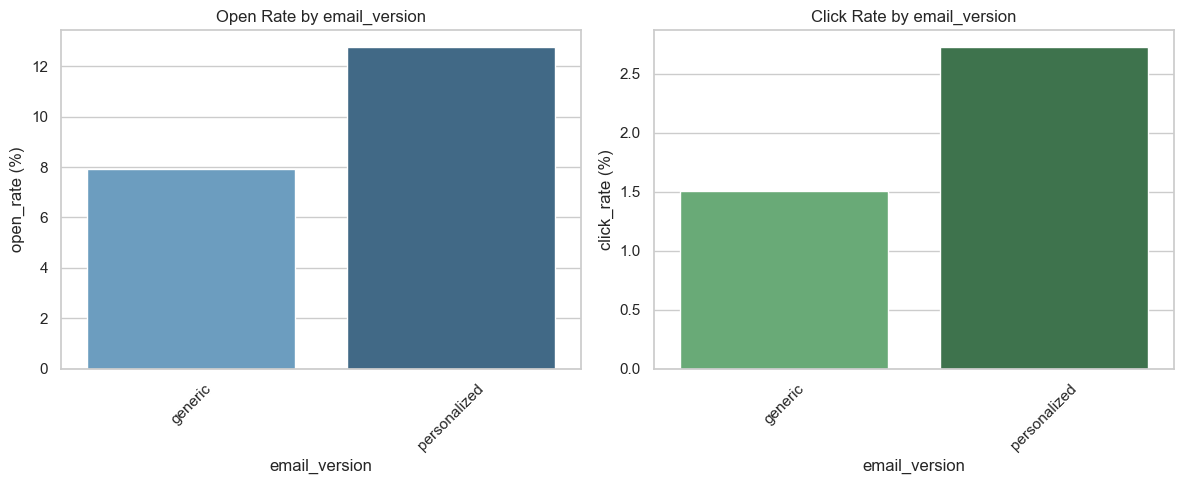

C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='open_rate (%)', data=data, palette='Blues_d')
C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='click_rate (%)', data=data, palette='Greens_d')


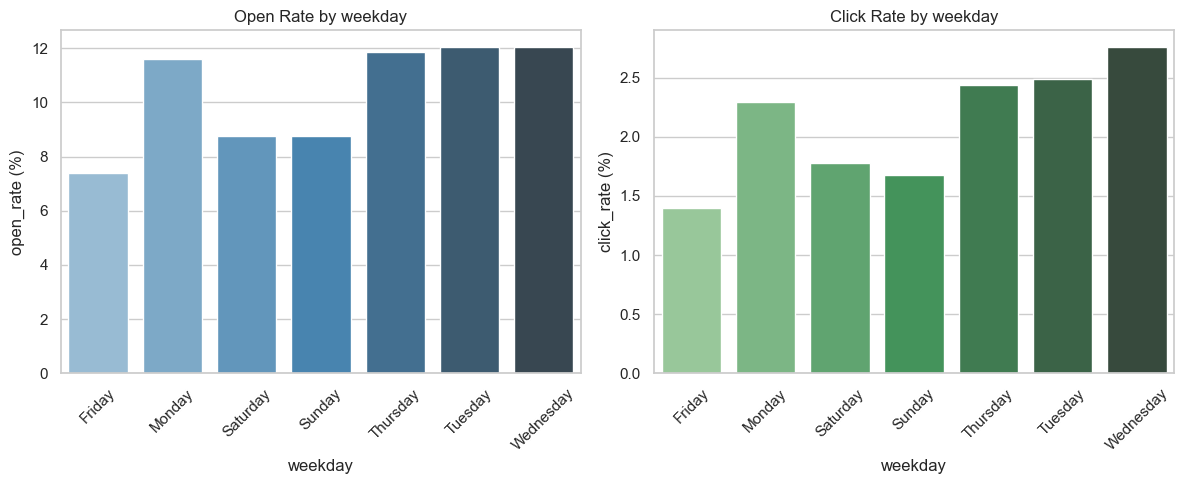

C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='open_rate (%)', data=data, palette='Blues_d')
C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\3658801326.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='click_rate (%)', data=data, palette='Greens_d')


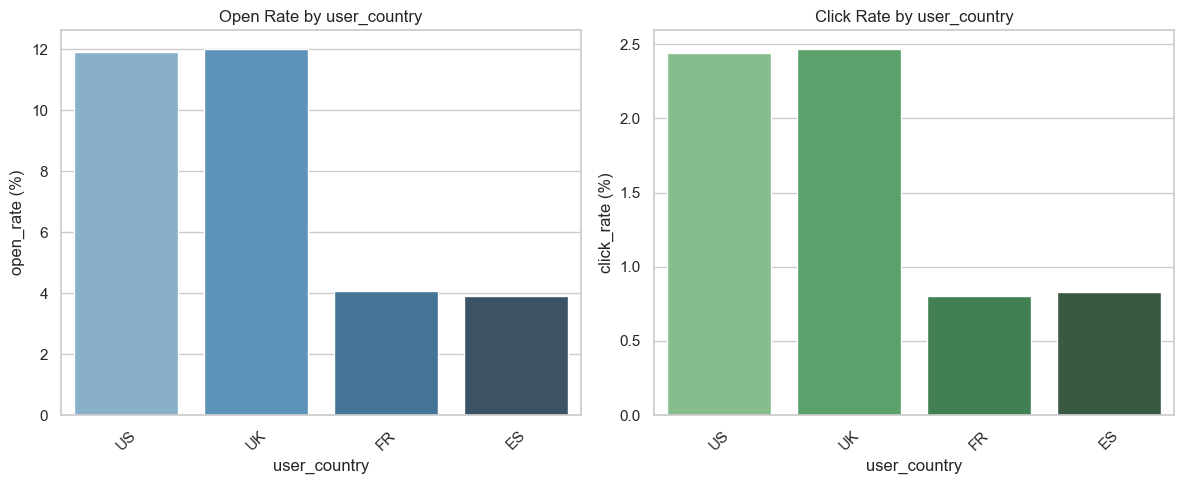

In [41]:
# Plot for each segment
plot_segment_trends(email, 'email_text')
plot_segment_trends(email, 'email_version')
plot_segment_trends(email, 'weekday')
plot_segment_trends(email, 'user_country', top_n=10)  # Top 10 countries only

 Analyzing Campaign Performance

In [42]:
# Adding 'opened' and 'clicked' flags to the email table
email['opened'] = email['email_id'].isin(email_opened['email_id']).astype(int)
email['clicked'] = email['email_id'].isin(link_clicked['email_id']).astype(int)

In [43]:
# Calculating totals
total_emails = len(email)
opened_emails = email['opened'].sum()
clicked_emails = email['clicked'].sum()

# Calculating percentages
percent_opened = (opened_emails / total_emails) * 100
percent_clicked = (clicked_emails / total_emails) * 100

# Printing results
print("Total Emails Sent:", total_emails)
print("Opened Emails:", opened_emails)
print("Clicked Emails:", clicked_emails)
print("% Opened:", round(percent_opened, 2), "%")
print("% Clicked:", round(percent_clicked, 2), "%")

Total Emails Sent: 100000
Opened Emails: 10345
Clicked Emails: 2119
% Opened: 10.34 %
% Clicked: 2.12 %


 Build a Machine Learning Model

  You can try classification models like Logistic Regression, Random Forest, or XGBoost.

In [44]:
#importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [45]:
# 1 Encoding categorical variables
df = email.copy()
le_text = LabelEncoder()
le_version = LabelEncoder()
le_country = LabelEncoder()
le_weekday = LabelEncoder()

In [46]:
df['email_text'] = le_text.fit_transform(df['email_text'])
df['email_version'] = le_version.fit_transform(df['email_version'])
df['user_country'] = le_country.fit_transform(df['user_country'])
df['weekday'] = le_weekday.fit_transform(df['weekday'])

In [47]:
# 2 Featuring columns and target
features = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']
X = df[features]
y = df['clicked']

In [48]:
# 3 Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Random Forest

In [49]:
# 4 Training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# 5 Evaluating model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.06      0.01      0.02       424

    accuracy                           0.98     20000
   macro avg       0.52      0.50      0.50     20000
weighted avg       0.96      0.98      0.97     20000

ROC AUC Score: 0.5775


C:\Users\gvais\AppData\Local\Temp\ipykernel_24344\1874296384.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


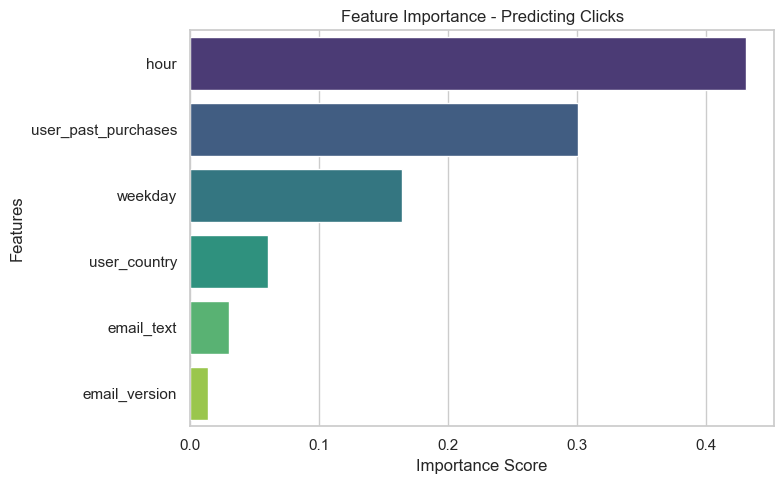

In [51]:
# 6 Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Ploting feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance - Predicting Clicks")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Encoding categorical features
df_encoded = pd.get_dummies(df[['email_text', 'email_version', 'weekday', 'user_country']], drop_first=True)

In [54]:
# Final dataset
X = pd.concat([df_encoded, df['hour'], df['user_past_purchases']], axis=1)
y = df['clicked']

In [55]:
# 2. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)[:, 1]


In [56]:
print("Logistic Regression Results:")
print(classification_report(y_test, logreg_preds))
print("ROC-AUC:", round(roc_auc_score(y_test, logreg_proba), 4))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       424

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000

ROC-AUC: 0.7219


C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

XG boost

In [57]:
from xgboost import XGBClassifier

In [58]:
# 3. XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [04:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
print("XGBoost Results:")
print(classification_report(y_test, xgb_preds))
print("ROC-AUC:", round(roc_auc_score(y_test, xgb_proba), 4))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       424

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000

ROC-AUC: 0.7178


Visualizing the ROC Curve for both

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [61]:
# Calculating FPR, TPR for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

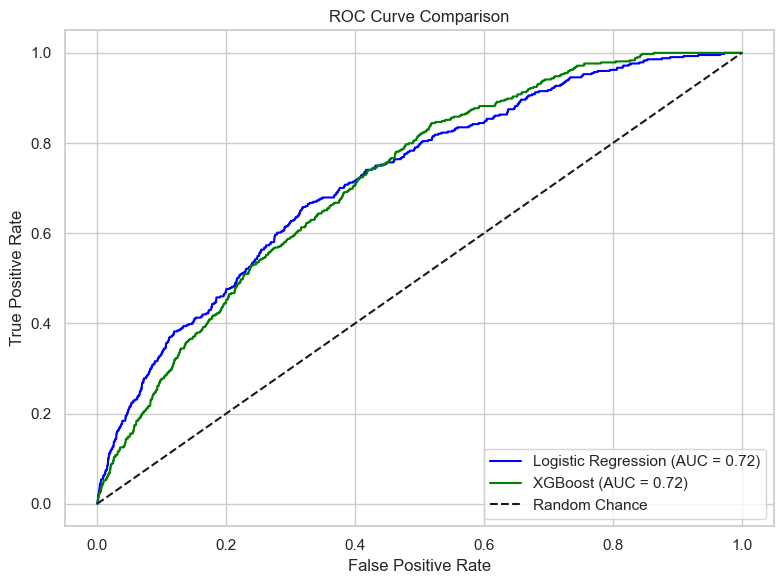

In [62]:
# Ploting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='green')

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

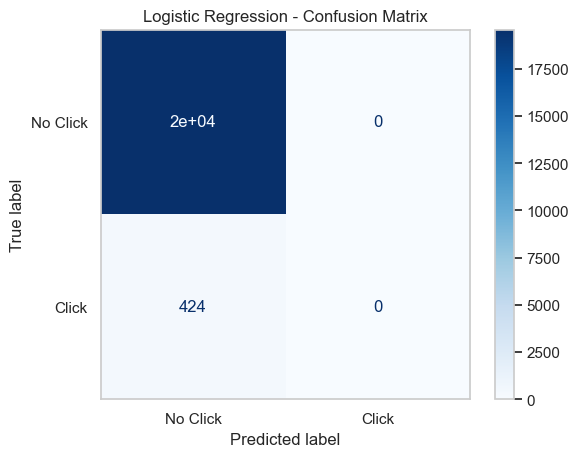

In [64]:
# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg_preds)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["No Click", "Click"])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

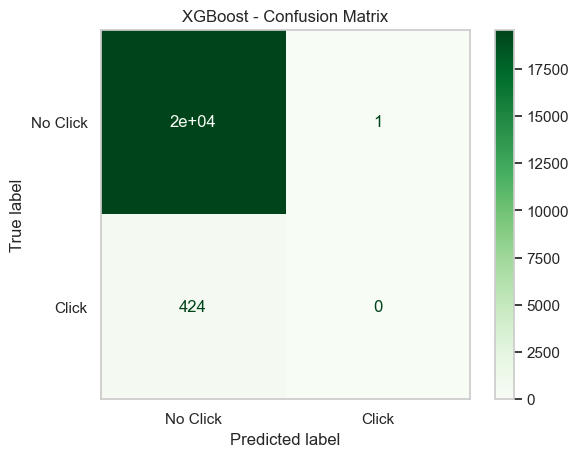

In [65]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["No Click", "Click"])
disp_xgb.plot(cmap=plt.cm.Greens)
plt.title("XGBoost - Confusion Matrix")
plt.grid(False)
plt.show()

C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


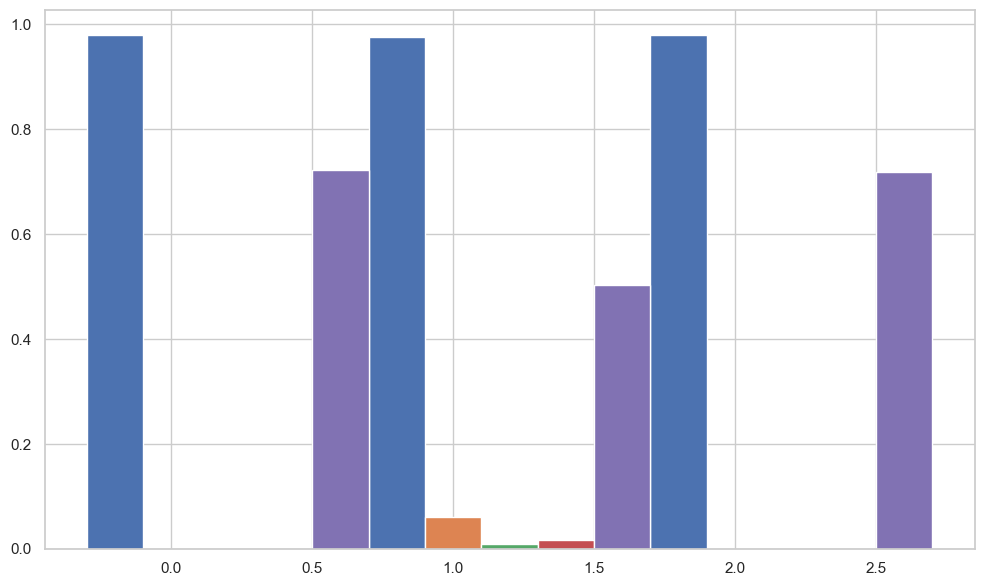

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Assuming you've already trained the models and made predictions:
logreg_preds, xgb_preds, y_pred
logreg_proba, xgb_proba, y_proba

# Calculate metrics for each model
metrics = {
    "Accuracy": [
        accuracy_score(y_test, logreg_preds),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, xgb_preds),
    ],
    "Precision": [
        precision_score(y_test, logreg_preds),
        precision_score(y_test, y_pred),
        precision_score(y_test, xgb_preds),
    ],
    "Recall": [
        recall_score(y_test, logreg_preds),
        recall_score(y_test, y_pred),
        recall_score(y_test, xgb_preds),
    ],
    "F1 Score": [
        f1_score(y_test, logreg_preds),
        f1_score(y_test, y_pred),
        f1_score(y_test, xgb_preds),
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, logreg_proba),
        roc_auc_score(y_test, y_pred),
        roc_auc_score(y_test, xgb_proba),
    ]
}

# Plotting
labels = ['Logistic Regression', 'Random Forest', 'XGBoost']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 7))

for i, (metric_name, values) in enumerate(metrics.items()):
    ax.bar(x + i*width - width, values, width, label=metric_name)

Estimate Model Improvement

In [67]:
import numpy as np

In [68]:
# 1. Predicting probabilities for all users
df['predicted_click_proba'] = model.predict_proba(df[features])[:, 1]

In [69]:
# 2. Actual CTR baseline
baseline_ctr = df['clicked'].sum() / len(df)

In [70]:
# 3. Sorting users by predicted click probability
df_sorted = df.sort_values(by='predicted_click_proba', ascending=False)

In [71]:
# 4. Simulating a campaign: send emails only to top N users
N = df['clicked'].sum()  # same number of emails as original clicked
top_users = df_sorted.head(int(N))

In [72]:
# 5. New estimated CTR
model_ctr = top_users['clicked'].sum() / len(top_users)

In [73]:
# 6. Improvement
improvement = ((model_ctr - baseline_ctr) / baseline_ctr) * 100

In [74]:
# 7. Printing results
print(f" Baseline CTR (Random): {baseline_ctr:.4f}")
print(f"Model-Based CTR (Top Users): {model_ctr:.4f}")
print(f" Estimated Improvement: {improvement:.2f}%")

 Baseline CTR (Random): 0.0212
Model-Based CTR (Top Users): 0.3601
 Estimated Improvement: 1599.27%


In [75]:
# Function to calculate open and click rates per segment
def segment_analysis(df, segment_col):
    segment_df = df.groupby(segment_col).agg(
        total_emails=('email_id', 'count'),
        opened=('opened', 'sum'),
        clicked=('clicked', 'sum')
    ).reset_index()

    segment_df['open_rate (%)'] = round((segment_df['opened'] / segment_df['total_emails']) * 100, 2)
    segment_df['click_rate (%)'] = round((segment_df['clicked'] / segment_df['total_emails']) * 100, 2)
    
    return segment_df.sort_values(by='click_rate (%)', ascending=False)

In [76]:
# Analyzing by different segments
segments = ['email_text', 'email_version', 'weekday', 'user_country']
segment_results = {}

for seg in segments:
    print(f"\n Segment Analysis by: {seg}")
    result = segment_analysis(email, seg)
    segment_results[seg] = result
    print(result)


 Segment Analysis by: email_text
    email_text  total_emails  opened  clicked  open_rate (%)  click_rate (%)
1  short_email         49724    5761     1187          11.59            2.39
0   long_email         50276    4584      932           9.12            1.85

 Segment Analysis by: email_version
  email_version  total_emails  opened  clicked  open_rate (%)  click_rate (%)
1  personalized         49791    6361     1359          12.78            2.73
0       generic         50209    3984      760           7.93            1.51

 Segment Analysis by: weekday
     weekday  total_emails  opened  clicked  open_rate (%)  click_rate (%)
6  Wednesday         14084    1694      389          12.03            2.76
5    Tuesday         14143    1704      352          12.05            2.49
4   Thursday         14277    1691      349          11.84            2.44
1     Monday         14363    1667      329          11.61            2.29
2   Saturday         14569    1277      260           8.77

Hyper parameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [78]:
# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
logreg_grid = GridSearchCV(LogisticRegression(class_weight='balanced'), logreg_params, cv=5, scoring='roc_auc')
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

In [80]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [81]:
# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [04:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [04:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gvais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [04:12:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

In [82]:
# Logistic Regression
logreg_preds = logreg_best.predict(X_test)
logreg_proba = logreg_best.predict_proba(X_test)[:, 1]

In [83]:
# Random Forest
rf_preds = rf_best.predict(X_test)
rf_proba = rf_best.predict_proba(X_test)[:, 1]

In [84]:
# XGBoost
xgb_preds = xgb_best.predict(X_test)
xgb_proba = xgb_best.predict_proba(X_test)[:, 1]

A/B test 

In [85]:
# True labels and predictions
true_labels = y_test

In [86]:
# Random baseline: simulating random predictions (same % as predicted by model)
random_preds = np.random.choice([0, 1], size=len(y_test), p=[0.8, 0.2])  # Adjust based on class balance
random_ctr = true_labels[random_preds == 1].mean()

In [87]:
# Model predictions: choosing users predicted to click
logreg_ctr = true_labels[logreg_preds == 1].mean()
rf_ctr = true_labels[rf_preds == 1].mean()
xgb_ctr = true_labels[xgb_preds == 1].mean()

In [88]:
# Improvement over random
logreg_improve = (logreg_ctr - random_ctr) / random_ctr * 100
rf_improve = (rf_ctr - random_ctr) / random_ctr * 100
xgb_improve = (xgb_ctr - random_ctr) / random_ctr * 100

In [89]:
print("Random CTR: {:.2f}%".format(random_ctr * 100))
print("Logistic Regression CTR: {:.2f}% | Improvement: {:.2f}%".format(logreg_ctr * 100, logreg_improve))
print("Random Forest CTR: {:.2f}% | Improvement: {:.2f}%".format(rf_ctr * 100, rf_improve))
print("XGBoost CTR: {:.2f}% | Improvement: {:.2f}%".format(xgb_ctr * 100, xgb_improve))

Random CTR: 1.73%
Logistic Regression CTR: 4.26% | Improvement: 146.25%
Random Forest CTR: 3.94% | Improvement: 128.00%
XGBoost CTR: nan% | Improvement: nan%


Saving the model

In [90]:
import pickle

In [91]:
# Saving XGBoost (best model)
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_best, f)

# Logistic Regression or Random Forest can be preferred:
# pickle.dump(logreg_best, open("logreg_model.pkl", "wb"))
# pickle.dump(rf_best, open("rf_model.pkl", "wb"))

print(" Model saved successfully as xgb_model.pkl")


 Model saved successfully as xgb_model.pkl


Running model

In [92]:
from flask import Flask, request, render_template

In [93]:
# Loading the saved model
with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [94]:
app = Flask(__name__)